# Lab 3: Keras

## 3.1 Introduction to _Deep Learning_ _frameworks_ 

<!-- Probablemente esto haya que moverlo en el futuro al lab 1 -->



### 3.1.1. Características de TensorFlow, PyTorch y JAX

* The main "low-level" deep learning frameworks today are __TensorFlow, PyTorch and JAX__.
* All these frameworks combine three key features:
    - A way to compute gradients for arbitrary differentiable functions (automatic differentation).
    - A way to run tensor computations on CPU and GPU (and possibly even on other specialized deep learning hardware such as TPUs).
    - A way to distribute computation across multiple devices or multiple computers, such as multiple GPUs on one computer, or even multiple GPUs across multiple separate computers.
* They all have their own way of doing things, their own strengths and weakenesses.

### 3.1.2 Advantages and disadvantages of TensorFlow

* TensorFlow (https://tensorflow.org)

__Advantages__

* Thanks to graph mode and XLA compilation, it’s fast. It’s usually significantly faster than PyTorch and NumPy, for instance (though JAX is often even faster).
* It is extremely feature-complete. It also has outstanding support for data preprocessing, via the highly performant `tf.data` API. 
* Its ecosystem for production deployment is the most mature among all frameworks, especially when it comes to deploying on mobile or in the browser.

__XLA__ was originally a high-performance compiler developed to enable TensorFlow to run on TPUs. Nowadays it evolved to OpenXLA (https://openxla.org/), an open ecosystem of performant, portable, and extensible machine learning (ML) infrastructure components that simplify ML development by defragmenting the tools between frontend frameworks and hardware backends

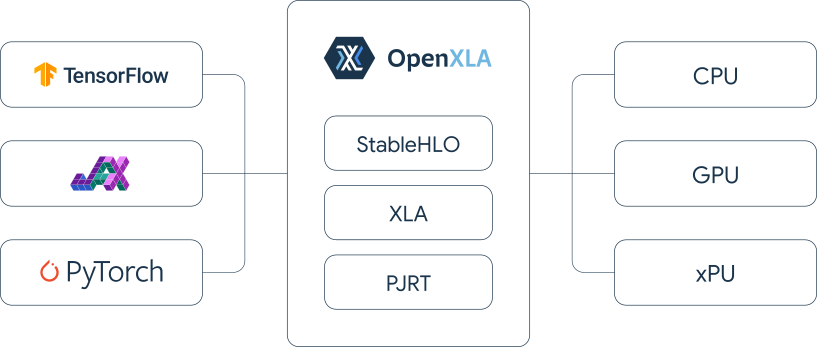

__Disadvantages__

* It has a sprawling API – the flipside of being very feature-complete. TensorFlow includes thousands of different operations.
* 
Its numerical API is occasionally inconsistent with the NumPy API, making it a bit harder to approach if you’re already familiar with NumPy
* 
The popular pretrained model sharing HuggingFace has lesser support for TensorFlow, which means that the latest generative AI models may not always be available in TensorFlow.

### 3.1.3 Advantages and disadvantages of PyTorch

* PyTorch (https://pytorch.org/)

__Advantages__

* PyTorch code executes eagerly by default, making is easy to debug (PyTorch is generally intended to be run eagerly at all times, wheras TensorFlow or JAX project will inevitably need compilation at some point, which can significantly hurt the debugging experience).
* 
The popular pretrained model sharing HuggingFace has first-class support for PyTorch, which means that any model you’d like to use is likely available in PyTorch. This is the primary drive behind PyTorch adoption today.

__Disadvantages__

* Like with TensorFlow, the PyTorch API is inconsistent with NumPy. This can make PyTorch frustrating to learn, especially when coming from NumPy.
* Due to its focus on eager execution, PyTorch is quite slow – it’s the slowest of all the major frameworks by a large margin.
While it is possible to make PyTorch code faster vi`a torch.compile` but s at this time (in 2024is ) quite ineffective and full of trapdoorss!*


### 3.1.4 Advantages and disadvantages of JAX

* JAX (https://jax.readthedocs.io/)

JAX was originally released as an alternative way to use autodifferentiation with XLA. JAX quickly gained traction with researchers thanks to its minimalistic API and high scalability. 

__Advantages__

* It’s fast. For most models, it is the fastest of all frameworks.
* Its numerical API is fully consistent with NumPy, making it pleasant to learn.
* It’s the best fit for training models on TPUs, as it was developed from the ground up for XLA and TPUs.

__Disadvantages__
 
* Its usage of metaprogramming and compilation can make it significantly harder to debug compared to pure eager execution.
* Low-level training loops tend to be more verbose and more difficult to write than in TensorFlow or PyTorch.

## 3.2 Basic characteristics of Keras

### 3.2.1. Introduction to Keras

* Keras (https://keras.io/)
* __Keras__ is a "high-level" framework. 
    - It is like a prefabricated building kit: it provides a streamlined interface for setting up and training neural networks.
    - In contrast, TensorFlow, PyTorch, and JAX are like the raw materials used in construction.
* Keras offers:
    - __Layers__, which are combined into a model.
    - A __loss function__, which defines the feedback signal used for learning.
    - An __optimizer__, which determines how learning proceeds.
    - __Metrics__ to evaluate model performance, such as accuracy.
    - A __training loop__ that performs mini-batch stochastic gradient descent.

* Keras uses TensorFlow, PyTorch, and JAX as __backend engines__.
    - Keras can be used together with either JAX, TensorFlow, or PyTorch. They’re the __backend frameworks__ of Keras.
    - Through these backend frameworks, Keras can run on top different types of hardware – GPU, TPU, or plain CPU – can be seamlessly scaled to thousands of machines, and can be deployed to a variety of platforms.

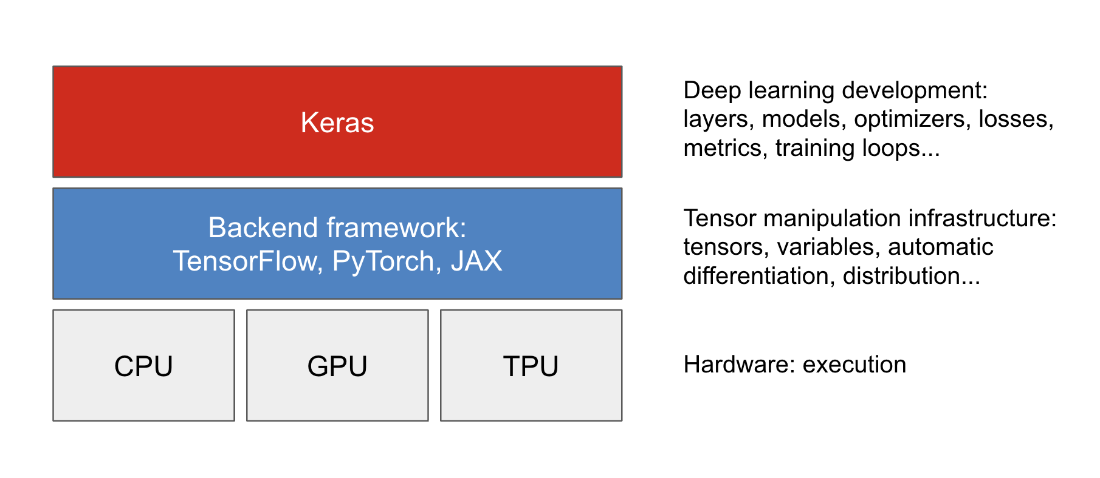

### 3.2.2. Selecting a backend

* Backend frameworks are pluggable:
    - You can switch to a different backend framework after you’ve written some Keras code.
    - You aren’t locked into a single framework and a single ecosystem – you can move your models from JAX to TensorFlow to PyTorch depending on your current needs.
    - For instance, when you develop a Keras model, you could debug it with PyTorch, train it on TPU with JAX for maximum efficiency, and finally run inference with the excellent tooling from the TensorFlow ecosystem.
* The default backend for Keras right now is TensorFlow, so if you run import keras in a fresh environment, without having configured anything, you will be running on top of TensorFlow.
* There are two ways to pick a difference backend:
   - Setting the environment variable `KERAS_BACKEND`.
   - Editing your local Keras configuration file at ~/.keras/keras.json.

__Set the environment variable `KERAS_BACKEND`.__

* Before you start your python repl, you can run the following shell command to use JAX as your Keras backend: `export KERAS_BACKEND=jax`.
* Alternatively, you can add the following code snippet at the top of your Python file or notebook (note that it must imperatively go before the first import keras):

In [10]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [12]:
import keras

AttributeError: module 'keras.src.backend' has no attribute 'common'

* When configuring the Keras backend, you should use the string `torch`  to refer to the PyTorch backend, rather than the string `pytorch`, which would be invalid.
* This is because the PyTorch package name is `torch` (as in `import torch` or `pip install torch`).

__Edit your local Keras configuration file__
* The file is at ~/.keras/keras.json.
* If you have already imported Keras once, then this file has already been created at the following location (with default settings).
* You can use any text editor to open it and make edit it – it’s a human-readable JSON file. It should look like this:

``` 
{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}
```

### 3.2.3. Keras layers and models

* __Layers__
    - Layers are the basic building blocks of neural networks in Keras.
    - A layer consists of a tensor-in tensor-out computation function (the layer's `call` method) and some state, held in TensorFlow variables (the layer's weights).


* __Models__
    - A model groups layers into an object with training/inference features.
    - URL: https://keras.io/api/models/
      
* There are three ways to create Keras models: sequential, functional and subclassing.

#### Sequential model

* It is the simplest model, defined as a linear stack of layers, mapping input data to output data.
* It is the most limited model, since it only follows a linear structure of single-input and single-output layers.
* Our first deep learning network will be implemented using the sequential model.

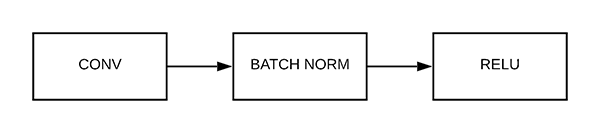

#### Functional API

* It is an easy-to-use, fully-featured API that supports arbitrary model architectures. 
* It defines more complex models and gives more freedom on how to structure its elements. 
* We can, for example, create models with multiple outputs and multiple inputs, define branches in the architecture, design acyclic directed graphs, create shared layers, etc.
* Any sequential model can be easily recreated using a functional model.

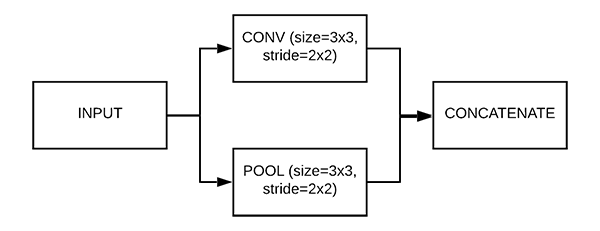

####  Model subclassing

* Keras uses a `Model` class for representing the different models.
* The subclassing model consists of inheriting from that class and redefining the methods from scratch.
* Is used in complex, out-of-the-box research use cases.

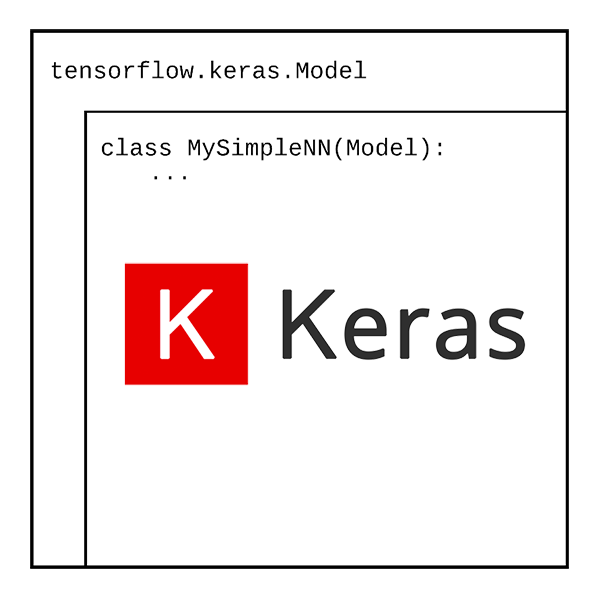

#### Progressive disclousure

* From simple workflows to more complex ones targeting different users.

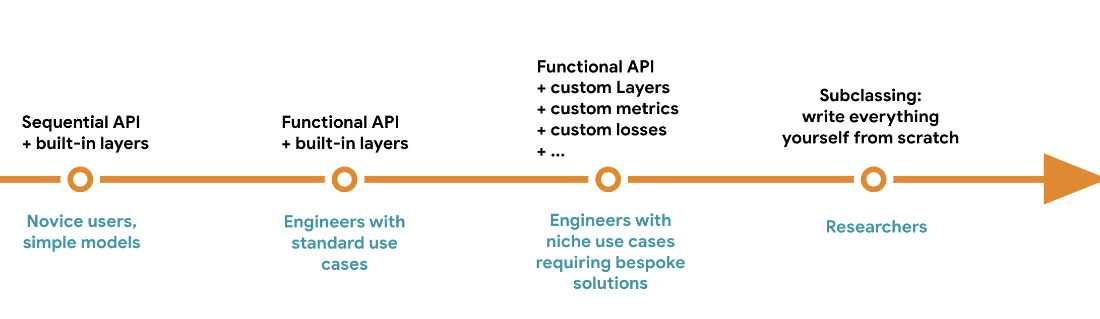

## 3.3 Understanding core Keras APIs

### 3.3.1 Layers

* __The fundamental data structure in neural networks is the layer__.
    - A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors.
    - Some layers are stateless, but more frequently layers have a state: the layer’s weights, one or several tensors learned with stochastic gradient descent, which together contain the network’s knowledge.
    - URL: https://keras.io/api/layers/

* __Types of layers__
    - **Core layers**: Main layers for building networks (https://keras.io/api/layers/core_layers/) 
        - _Input layer_: Used to instantiate a Keras tensor.
        - _Dense layer_: A regular densely-connected NN layer.
        - _Activation layer_: Applies an activation function to an output.
    - **Layers for managing input**
        - _Preprocessing layers_: allows developers to build Keras-native input processing pipelines.
        - _Normalizaton layers_: Layers that normalize its inputs.
        - _Reshaping layers_: Layers that reshape inputs into a given shape.
    - **Layers for convolutional networks**: To manage image data.
        - _Convolutional layers_
        - _Pooling layers_
    - **Layers for recurrent networks**: To manage sequence data
        - _LSTM layers_
        - _GRU layers_
        - _Bidirectional layers_
    - **Attention layers**: Attention mechanisms are the basis for transformer architectures.
  
<!--    
    - Different types of layers are appropriate for different tensor formats and different types of data processing.
    - Simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the `Dense` class in Keras).
    - Sequence data, stored in 3D tensors of shape (samples, timesteps, features), is typically processed by recurrent layers, such as an `LSTM` layer, or 1D convolution layers (`Conv1D`).
    - Image data, stored in rank-4 tensors, is usually processed by 2D convolution layers (`Conv2D`).
-->    

#### The base `Layer` class in Keras

* A Layer is an object that encapsulates some state (weights) and some computation (a forward pass). The weights are typically defined in a `build()` (although they could also be created in the constructor `init()`), and the computation is defined in the `call()` method.
* URL: https://keras.io/api/layers/base_layer/
* The following code shows how we can implement a `NaiveDense` class that represents a neural network dense layer that, given a input vector (`input`), a matrix of weights(`W`), a vector of bias (`b`) and a given activation function (`activation`) performs the following computation: `output = activation(matmul(input, W) + b)`. 

In [3]:
class NaiveDense(keras.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = keras.ops.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

* A layer is a `callable` object that takes as input one or more tensors and that outputs one or more tensors.
* Therefore, once instantiated, a layer can be used just like a function, taking as input a tensor.

In [4]:
my_dense = NaiveDense(units=32, activation=keras.ops.relu)
input_tensor = keras.ops.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference in layers

* Objects that are `callable` implements the `__call()__` method.
* Our `NaiveDense` layer does not implement `__call()__` because its superclass `keras.Layer` is already doing it.
* The `keras.Layer` version of `__call()__` _builds_ the weights in a `build()` method before calling to another `call()` method.
* `build()` receives as argument the first input shape seen by the layer and creates the weights and the bias for that layer.

In [5]:
def __call__(self, inputs):
    if not self.built:
         self.build(inputs.shape)
         self.built = True
    return self.call(inputs)

* This automatic shape inference in layers allows to stack layers in a simple and neat way

In [6]:
model = keras.Sequential([
    NaiveDense(32, activation="relu"),
    NaiveDense(64, activation="relu"),
    NaiveDense(32, activation="relu"),
    NaiveDense(10, activation="softmax")
])

In [7]:
output_tensor

Array([[0.        , 2.116261  , 0.        , 0.        , 0.5684754 ,
        0.36306334, 0.        , 0.08879733, 0.35164547, 1.9964188 ,
        0.        , 0.        , 1.6008898 , 0.44354093, 0.        ,
        0.        , 0.        , 0.0446229 , 0.        , 0.        ,
        0.        , 0.        , 0.2344575 , 0.        , 0.        ,
        1.2694098 , 0.        , 1.3547686 , 0.        , 0.        ,
        0.08774272, 0.        ],
       [0.        , 2.116261  , 0.        , 0.        , 0.5684754 ,
        0.36306334, 0.        , 0.08879733, 0.35164547, 1.9964188 ,
        0.        , 0.        , 1.6008898 , 0.44354093, 0.        ,
        0.        , 0.        , 0.0446229 , 0.        , 0.        ,
        0.        , 0.        , 0.2344575 , 0.        , 0.        ,
        1.2694098 , 0.        , 1.3547686 , 0.        , 0.        ,
        0.08774272, 0.        ]], dtype=float32)

### 3.3.3 From Layers to Models: the `Sequential` model

* A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
* A Sequential model is not appropriate when:
    - Your model has multiple inputs or multiple outputs
    - Any of your layers has multiple inputs or multiple outputs
    - You need to do layer sharing
    - You want non-linear topology (e.g. a residual connection, a multi-branch model)

#### Creating a `Sequential` model

* You can create a Sequential model by passing a list of layers to the `Sequential` constructor.
* URL: https://keras.io/guides/sequential_model/

In [8]:
from keras import layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

* Its layers are accessible via the layers attribute:

In [9]:
model.layers

[<Dense name=dense, built=False>,
 <Dense name=dense_1, built=False>,
 <Dense name=dense_2, built=False>]

* You can also create a Sequential model incrementally via the add() method:

In [10]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

* Note that there's also a corresponding pop() method to remove layers: a Sequential model behaves very much like a list of layers

In [11]:
model.pop()
print(len(model.layers))  # 2

2


* Also note that the Sequential constructor accepts a name argument, just like any layer or model in Keras.
* This is useful to annotate TensorBoard graphs with semantically meaningful names.

In [12]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

#### Specifying the input shape

* All layers in Keras need to know the shape of their inputs in order to be able to create their weights.
* If we instantiate a Sequential model without an input shape, it isn't "built": it has no weights.
* We can see this using the `summary()` method.

In [13]:
model.summary()

Model: "my_sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

* If we do not want to wait for the model to see the first input to build the weights we can use an `Input` object.
* Using the `Input` object the model knows the input shape from the start and can build the weights.
* We call such an object a ''symbolic tensor''. It doesn’t contain any actual data, but it encodes the specifications of the actual tensors of data that the model will see when you use it.

In [14]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

* The `Input` object is not displayed as part of model.layers, since it isn't a layer:

In [15]:
model.layers

[<Dense name=dense_6, built=True>]

### 3.3.4 Training our model

* Once the model architecture is defined, you still have to choose three more things:

1. __Loss function__
    - The quantity that will be minimized during training.
    - It represents a measure of success for the task at hand.
2. __Optimizer__
    - Determines how the network will be updated based on the loss function.
    - It implements a specific variant of stochastic gradient descent (SGD).
4. __Metrics__
    - The measures of success you want to monitor during training and validation, such as classification accuracy.
    - Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.

* Once you’ve picked your loss, optimizer, and metrics, you can use the built-in `compile()` and `fit()` methods to start training your model.
* URL: https://keras.io/api/models/model_training_apis/

#### The compile method

* The compile() method configures the training process
* It takes the arguments optimizer, loss, and metrics (a list).
* Parameters can be passed as __strings__.

In [16]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

* These strings are actually shortcuts that get converted to Python objects.
    - For instance, `rmsprop` becomes `keras.optimizers.RMSprop()`
* It’s also possible to specify these arguments as __object instances__.
    - This is useful if you want to pass your own custom losses or metrics, or if you want to further configure the objects you’re using – for instance, by passing a learning_rate argument to the optimizer.

In [17]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.Accuracy()])

__Optimizers:__ https://keras.io/api/optimizers/

* `SGD()` 
* `RMSprop()`
* `Adam()`
* `Etc.

__Losses__: https://keras.io/api/losses/

* `CategoricalCrossentropy()`
* `SparseCategoricalCrossentropy()`
* `BinaryCrossentropy()`
* `MeanSquaredError()`
* `KLDivergence()`
* `CosineSimilarity()`
* Etc.
  
__Metrics__: https://keras.io/api/metrics/

* `CategoricalAccuracy()`
* `SparseCategoricalAccuracy()`
* `BinaryAccuracy()`
* `AUC()`
* `Precision()`
* `Recall()`
* Etc.

#### The fit method

* The fit method implements the training loop itself. Its key arguments are:
    - __The data (inputs and targets) to train on__: It will typically be passed either in the form of NumPy arrays, or a TensorFlow Dataset object.
    - __The number of epochs to train for__: how many times the training loop should iterate over the data passed.
    - __The batch size to use within each epoch of mini-batch gradient descent__: the number of training examples considered to compute the gradients for one weight update step.

```
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)
```

* The `fit` method returns a `History` object. 
* This object has a `history` property which is a dictionary containing the data of everything that has happened during the training.
* It has several keys such as: `loss`, `accuracy`, `val_loss`, `val_accuracy` depending on how we configured the `compile()` and `fit()` method. 

#### Validation data

* Additionally, we can pass _validation data_ to the `fit()` method using the `validation_data` argument to avoid overfitting.
* Like the training data, the validation data could be passed as NumPy arrays or as a TensorFlow Dataset object.

```
model.fit(
    training_inputs,     
    training_targets,    
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)     
)
```

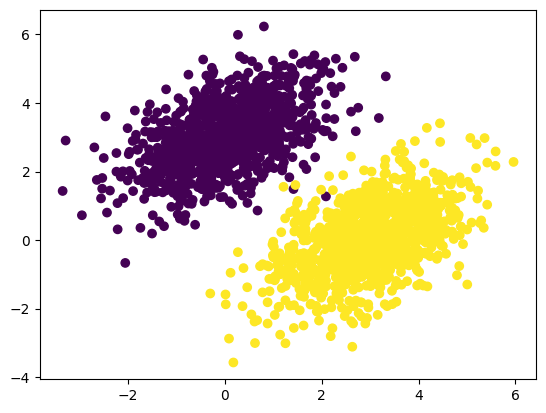

In [18]:
import numpy as np

# Generating two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

# Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generating the corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

# Plotting the two point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [19]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
history = model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.7815 - loss: 0.6329 - val_binary_accuracy: 0.8900 - val_loss: 0.1477
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - binary_accuracy: 0.9446 - loss: 0.0800 - val_binary_accuracy: 0.6767 - val_loss: 0.3635
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - binary_accuracy: 0.9418 - loss: 0.0904 - val_binary_accuracy: 0.9983 - val_loss: 0.0351
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - binary_accuracy: 0.9598 - loss: 0.0684 - val_binary_accuracy: 0.9967 - val_loss: 0.0384
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - binary_accuracy: 0.9542 - loss: 0.0726 - val_binary_accuracy: 0.9550 - val_loss: 0.0982


In [20]:
history.history

{'binary_accuracy': [0.8928571343421936,
  0.9514285922050476,
  0.956428587436676,
  0.956428587436676,
  0.9535714387893677],
 'loss': [0.21491381525993347,
  0.07393598556518555,
  0.07250680774450302,
  0.07150015980005264,
  0.07330474257469177],
 'val_binary_accuracy': [0.8899999856948853,
  0.6766666769981384,
  0.9983333349227905,
  0.996666669845581,
  0.9549999833106995],
 'val_loss': [0.14772988855838776,
  0.3635197579860687,
  0.0350964330136776,
  0.03835337609052658,
  0.09818491339683533]}

#### Monitoring loss & metrics on validation data

* If you want to compute the validation loss and metrics after training is complete, you can call the `evaluate` method.
* `evaluate()` will iterate in batches (of size `batch_size`) over the data passed, and return a list of scalars, where the first entry is the validation loss and the following entries are the validation metrics. If the model has no metrics, only the validation loss is returned (rather than a list).

In [21]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_accuracy: 0.9517 - loss: 0.1002


#### Inference: using a model after training

* To perform an inference we use the `predict()` method.
* It will iterate over the data in small batches, and return a NumPy array of predictions.
* It can also process TensorFlow Dataset objects.


In [22]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[ 0.3035007 ]
 [-0.35873595]
 [ 0.65488124]
 [-0.24643138]
 [ 0.754437  ]
 [ 0.80997074]
 [ 0.5682164 ]
 [-0.37930742]
 [ 1.0379059 ]
 [ 0.7793944 ]]


## 3.4 The Functional API

### 3.4.1. Basic structure

* The Sequential model is easy to use, but its applicability is extremely limited: it can only express models with a single input and a single output, applying one layer after the other in a sequential fashion.
* In practice, it’s pretty common to encounter models with multiple inputs (say, an image and its metadata), multiple outputs (different things you want to predict about the data), or a non-linear topology.
* In such cases, you’d build your model using the Functional API. 

* As in the sequential model, in the functional model we start also declaring an `Input` object.

In [23]:
inputs = keras.Input(shape=(3,), name="my_input")

* Next, we created a layer and called it on the input.
* Remember that layers are _callable_.

In [24]:
features = layers.Dense(64, activation="relu")(inputs)

* After obtaining the final outputs, we instantiated the model by specifying its inputs and outputs in the Model constructor

In [25]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs, name="my_functional_model")

* Let's see all the lines together 

In [26]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs, name="my_functional_model")

In [27]:
model.summary()

Model: "my_functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### 3.4.2. Multi-input, multi-output models

* Most deep learning models don’t look like lists, they look like graphs.
* They may, for instance, have multiple inputs or multiple outputs.

#### Example

* Let’s say you’re building a system to rank customer support tickets by priority and route them to the appropriate department.
* Your model has three inputs:
    1. The title of the ticket (text input).
    2. The text body of the ticket (text input).
    3. Any tags added by the user (categorical input, assumed here to be one-hot encoded).
* We can encode the text inputs as arrays of ones and zeros of size `vocabulary_size`.
* Your model also has two outputs:
    1. The priority score of the ticket, a scalar between 0 and 1 (sigmoid output).
    2. The department that should handle the ticket (a softmax over the set of departments).
* Let's build this example using the Fuctional API.

In [28]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

* You can train your model in much the same way as you would train a Sequential model, by calling fit() with lists of input and output data.
* These lists of data should respect the same order as what you passed to the Model() constructor.

In [29]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="adam",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - department_accuracy: 0.3108 - department_loss: 13.1272 - loss: 13.3810 - priority_loss: 0.2538 - priority_mean_absolute_error: 0.4213
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - department_accuracy: 0.3012 - department_loss: 9.2917 - loss: 9.3763 - priority_loss: 0.0846 - priority_mean_absolute_error: 0.2489
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step


#### Plotting layer connectivity

* Let’s visualize the connectivity of the model we just defined (the topology of the model).
* You can plot a Functional model as a graph with the `plot_model()` utility

__Previous steps__

* For the `plot_model()` method to work properly we need to install the Pydot library and the graphical library Graphviz.
* Steps:
    1. `pip install pydot`
    2. `pip install pydotplus`
    3. `pip install graphviz`
    4. Download and install graphviz binaries from: https://graphviz.org/download/
    5. Add path to graphviz bin folder in system PATH
    6. Close session and open again to refresh the PATH variable
    7. Use the `keras.utils.plot_model()` method: https://keras.io/api/utils/model_plotting_utils/

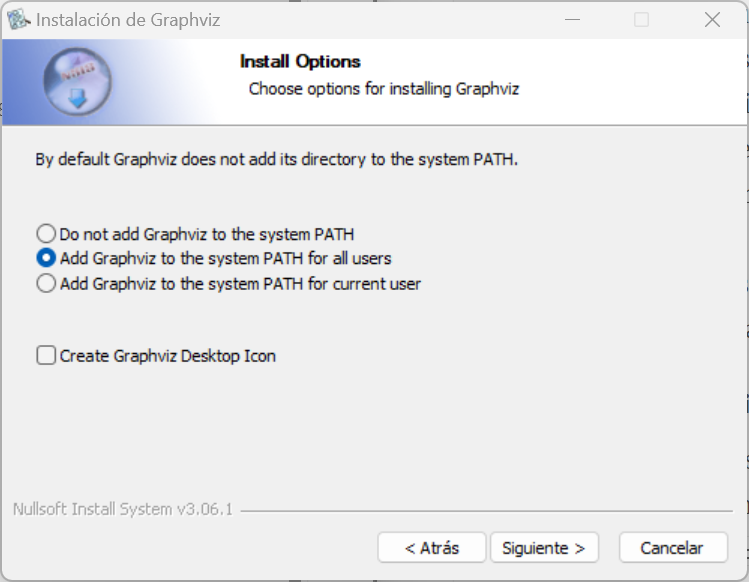

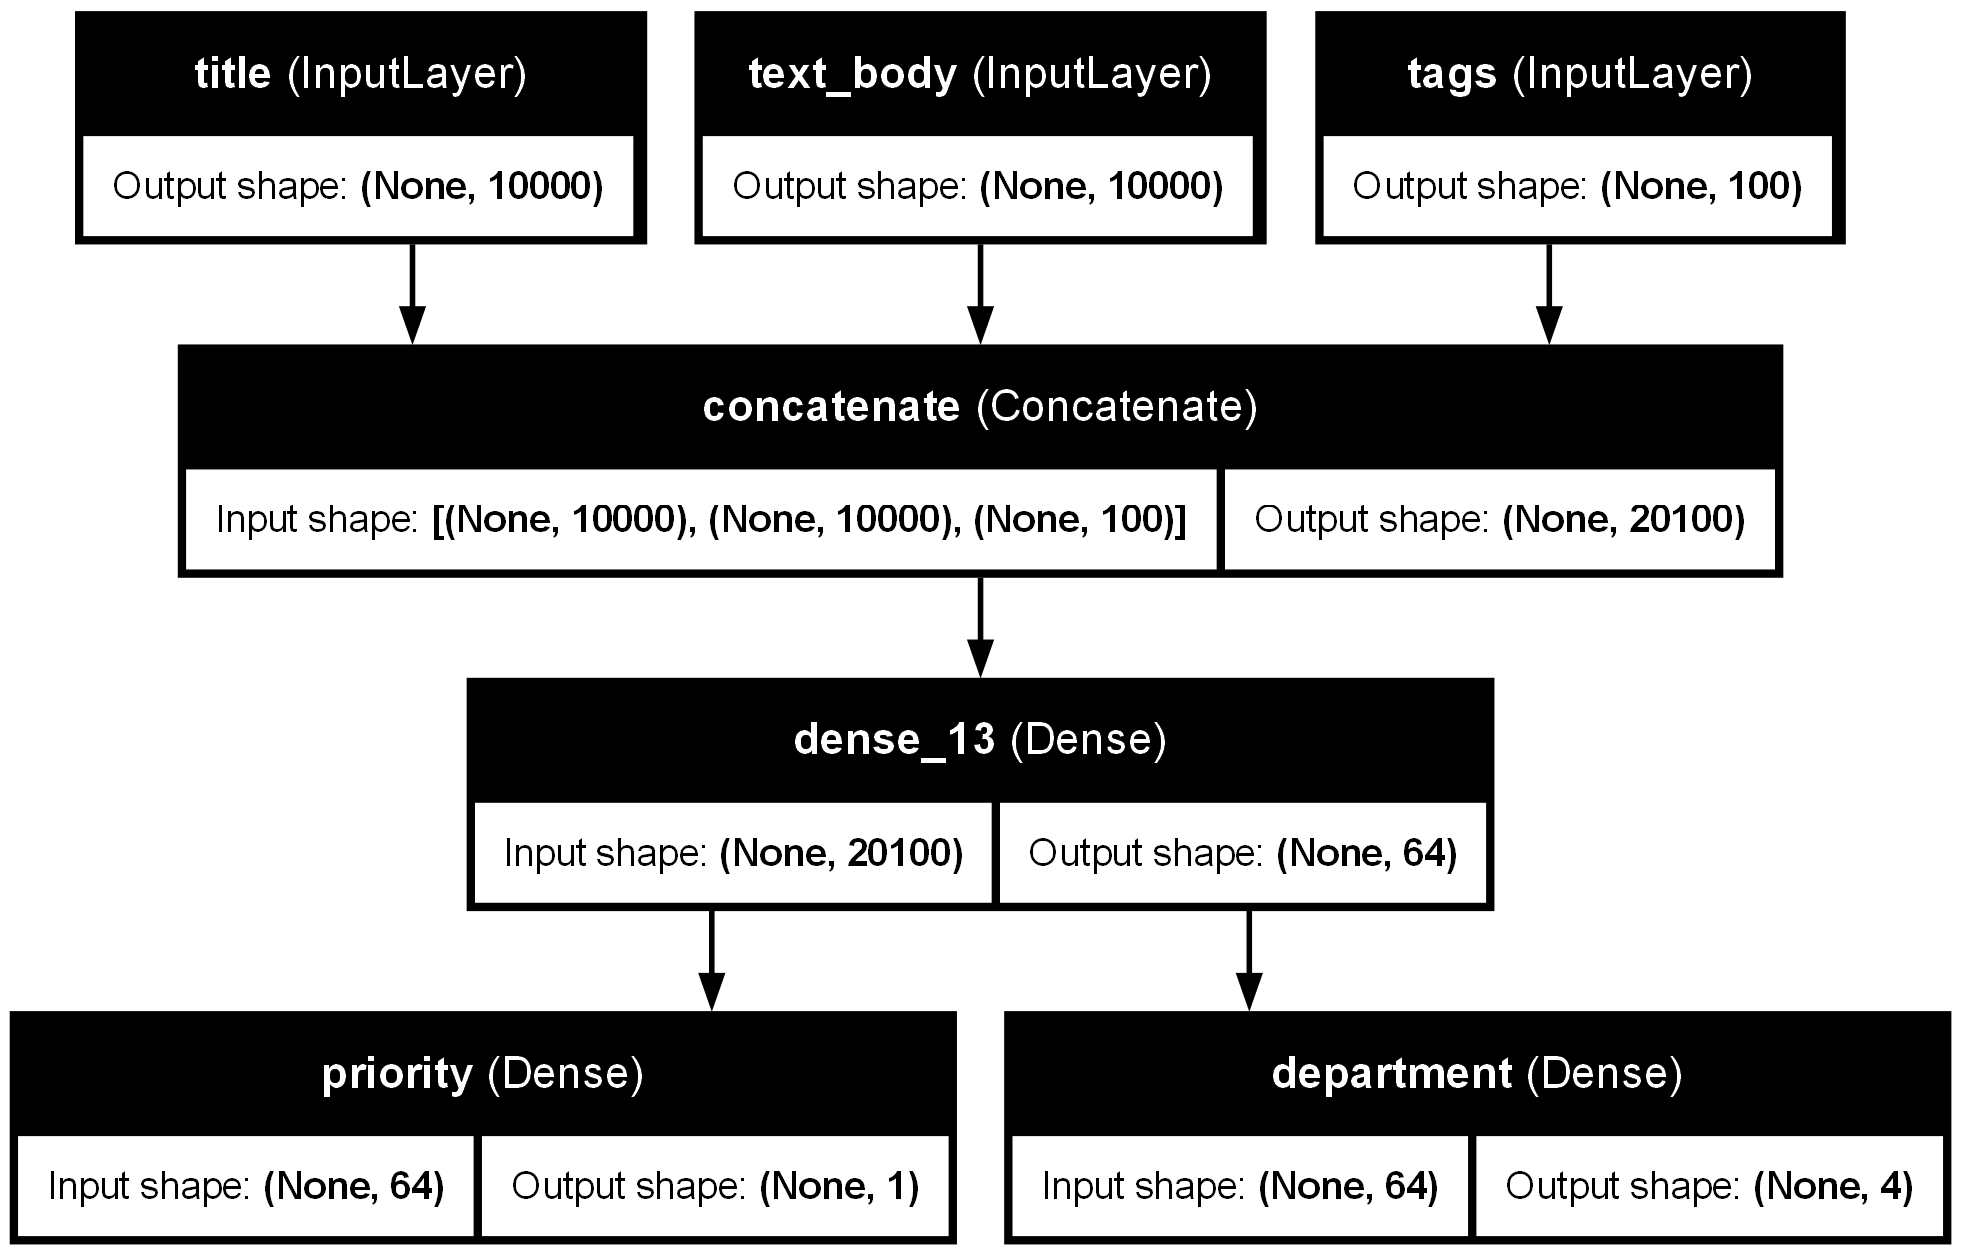

In [30]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True, show_layer_names=True)

## 3.5 German Credit Numeric example 

### 3.5.1 Sequential model

In [31]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Cargamos el conjunto de datos
ds = tfds.load('german_credit_numeric', split='train',as_supervised=True)

tamano_lote = 1000

elems = ds.batch(tamano_lote)
lote_entrenamiento = None
for elem in elems:
    lote_entrenamiento = elem
    break

In [32]:
#TODO - indicar la función de perdida y el algoritmo de optimización
#fn_perdida = ...
#optimizador = ...
#Definimos la métrica Precision 
metrica = tf.keras.metrics.Precision()

In [33]:
tamano_entrada = 24
h0_size = 5
h1_size = 3
#TODO - define el modelo indicando un nombre 
#model =  ...

model.add( tf.keras.layers.InputLayer((tamano_entrada,)))
#TODO - incluye las 3 capas Dense al modelo 

#Se construye el modelo y se muestra
model.build()
print(model.summary())

Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 5)              │           125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

None


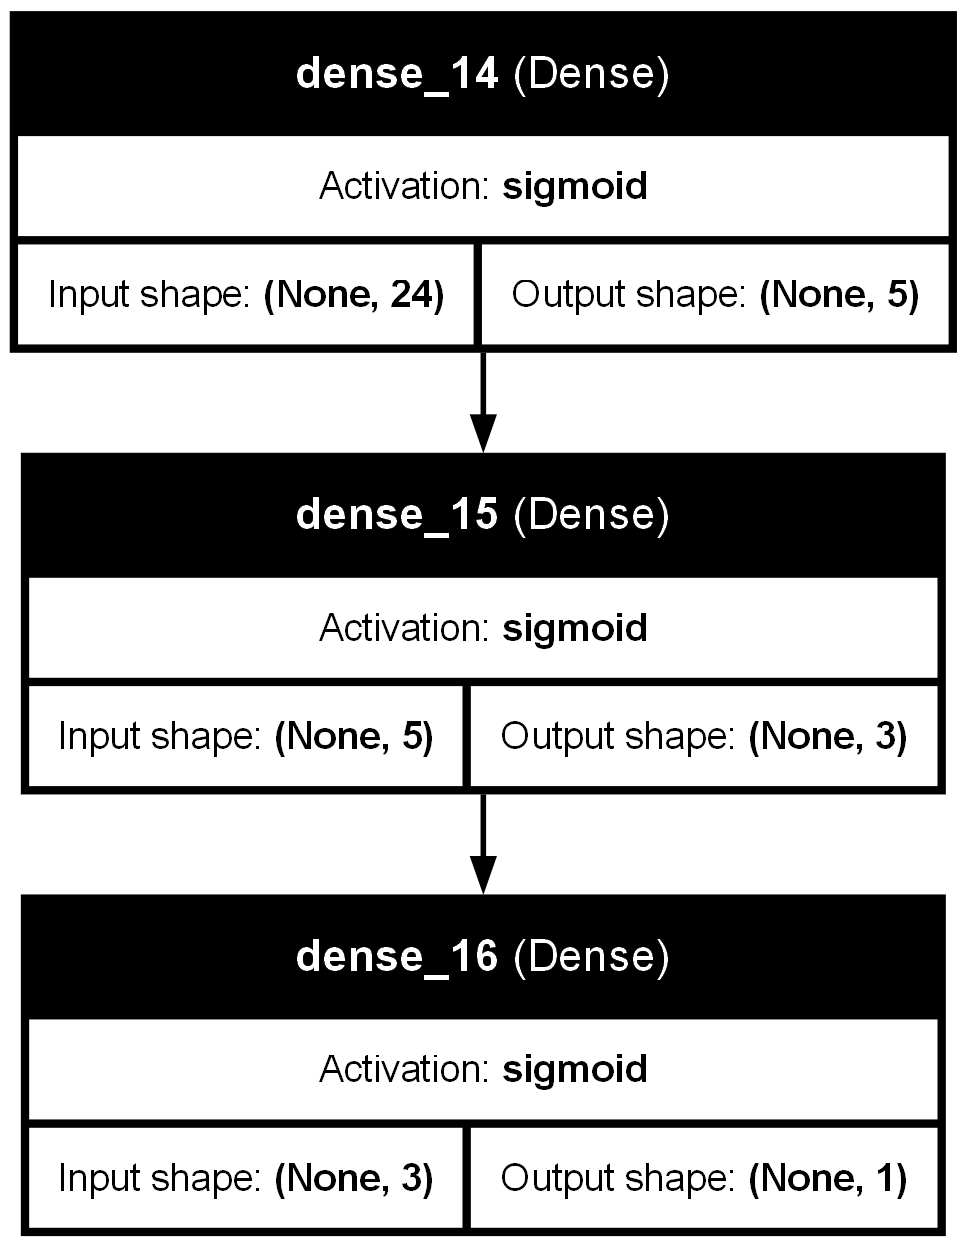

In [34]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [35]:
#TODO - indicar los parametros del método compile
#model.compile(loss=...,
              optimizer=...,
              metrics=...)

In [36]:
num_epochs =  50
#TODO - entrenar el modelo
#history = model.fit(...)
history.history

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 0.7519 - precision: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.7374 - precision: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7244 - precision: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7127 - precision: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7023 - precision: 1.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6929 - precision: 0.7107
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6844 - precision: 0.7143
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6769 - precision: 0.7167
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6701 - precision: 0.7058
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6640 - precision: 0.6994
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6586 - precision: 0.7000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6537 -

{'loss': [0.7518973350524902,
  0.7374309301376343,
  0.7244268655776978,
  0.7127439975738525,
  0.7022580504417419,
  0.6928562521934509,
  0.6844320297241211,
  0.6768835186958313,
  0.6701166033744812,
  0.6640453934669495,
  0.6585941314697266,
  0.6536957025527954,
  0.649291455745697,
  0.645329475402832,
  0.6417632102966309,
  0.6385511755943298,
  0.6356562376022339,
  0.6330453157424927,
  0.6306886672973633,
  0.6285600066184998,
  0.6266357898712158,
  0.6248948574066162,
  0.6233182549476624,
  0.6218889355659485,
  0.6205915808677673,
  0.6194127202033997,
  0.6183403134346008,
  0.6173635125160217,
  0.6164726614952087,
  0.6156588792800903,
  0.6149143576622009,
  0.6142324209213257,
  0.6136071681976318,
  0.613033652305603,
  0.612507700920105,
  0.6120253205299377,
  0.6115829348564148,
  0.6111771464347839,
  0.6108044981956482,
  0.610461950302124,
  0.6101464033126831,
  0.6098551154136658,
  0.6095853447914124,
  0.6093342900276184,
  0.6090993881225586,
  0.608

In [37]:
#TODO - llamar a evaluate, guardando el resultado
#result = model.evaluate(...) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.6079 - precision: 0.7000


In [38]:
# Mostramos el resultado obtenido
print(model.metrics_names)
print(result)

['loss', 'compile_metrics']
[0.6079068779945374, 0.699999988079071]


### 3.5.2 Functional model

In [39]:
inputs = keras.Input(shape=(24,))
inputs.shape

(None, 24)

In [40]:
h0_size = 5
h1_size = 3
x = layers.Dense(h0_size, activation='sigmoid')(inputs)
#TODO - crear el resto de capas 
x = ...
outputs = ...

In [41]:
#TODO- definir el modelo 
model = keras.Model(inputs=..., outputs=..., name=...)

#TODO- mostrar un resumen del modelo

Model: "credit_german_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │           125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
#TODO compilar el modelo


#TODO determinar el numero de epochs
num_epochs =  ...

#TODO - entrenar el modelo 

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.6468 - precision_1: 0.7000
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.6435 - precision_1: 0.7000
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6406 - precision_1: 0.7000
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6379 - precision_1: 0.7000
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6355 - precision_1: 0.7000  


In [43]:
history.history

{'loss': [0.7518973350524902,
  0.7374309301376343,
  0.7244268655776978,
  0.7127439975738525,
  0.7022580504417419,
  0.6928562521934509,
  0.6844320297241211,
  0.6768835186958313,
  0.6701166033744812,
  0.6640453934669495,
  0.6585941314697266,
  0.6536957025527954,
  0.649291455745697,
  0.645329475402832,
  0.6417632102966309,
  0.6385511755943298,
  0.6356562376022339,
  0.6330453157424927,
  0.6306886672973633,
  0.6285600066184998,
  0.6266357898712158,
  0.6248948574066162,
  0.6233182549476624,
  0.6218889355659485,
  0.6205915808677673,
  0.6194127202033997,
  0.6183403134346008,
  0.6173635125160217,
  0.6164726614952087,
  0.6156588792800903,
  0.6149143576622009,
  0.6142324209213257,
  0.6136071681976318,
  0.613033652305603,
  0.612507700920105,
  0.6120253205299377,
  0.6115829348564148,
  0.6111771464347839,
  0.6108044981956482,
  0.610461950302124,
  0.6101464033126831,
  0.6098551154136658,
  0.6095853447914124,
  0.6093342900276184,
  0.6090993881225586,
  0.608

In [44]:
#TODO - evaluar el modelo


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.6333 - precision_1: 0.7000


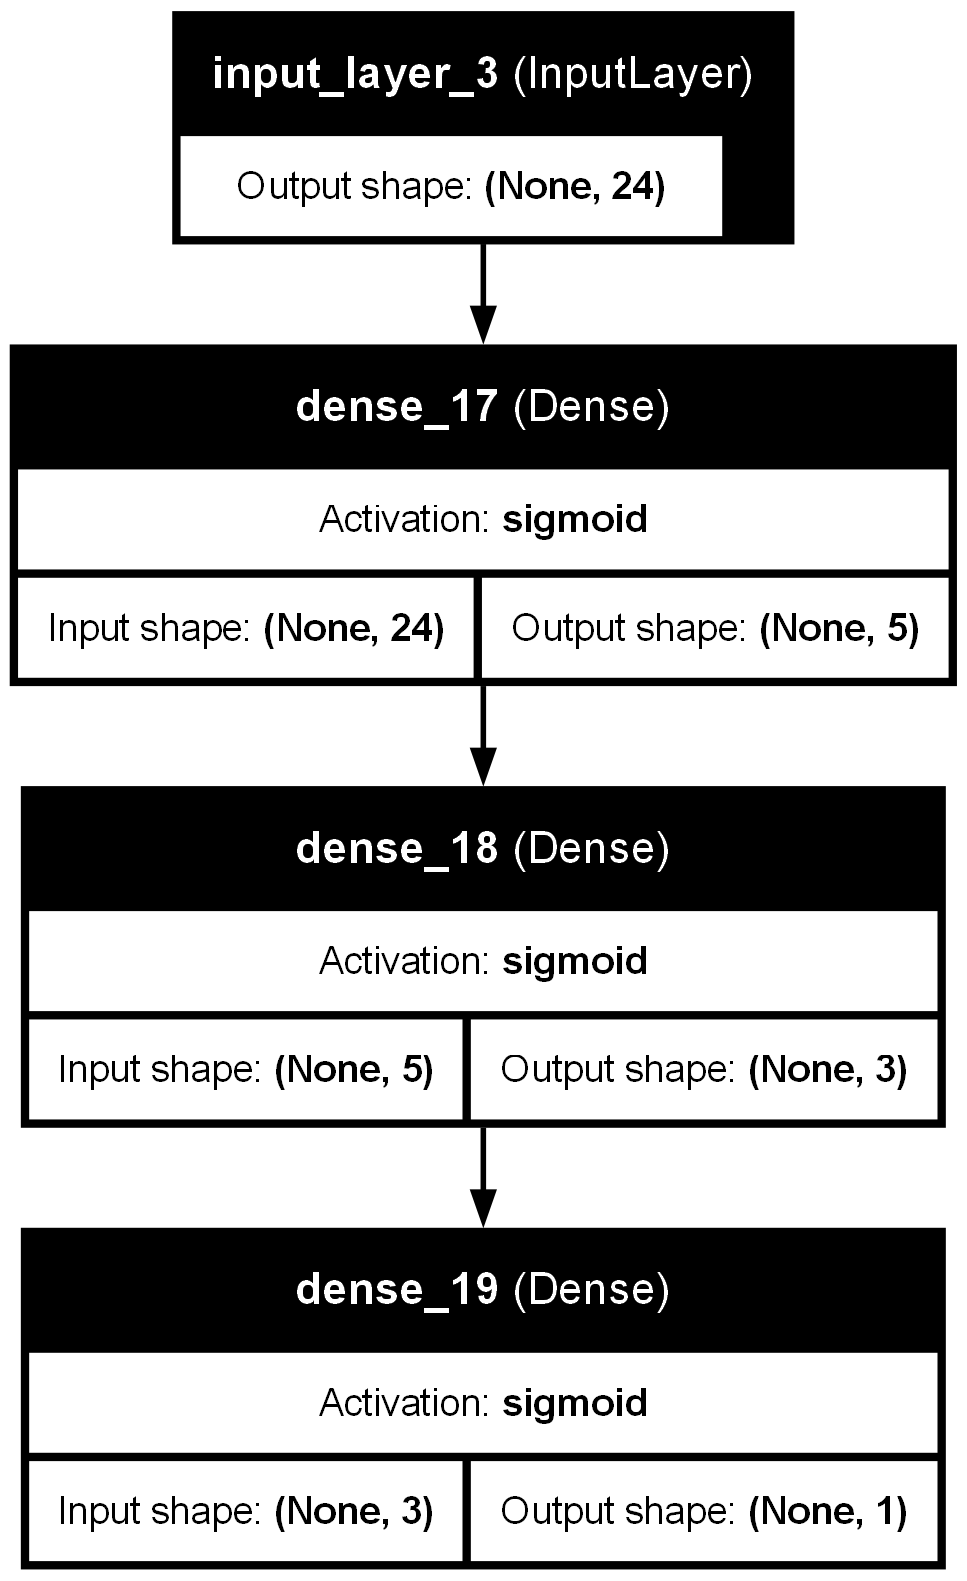

In [45]:
#TODO: muestra el gráfico del modelo
